In [1]:
# !pip install perceval-quandela

In [2]:
import perceval as pcvl
import numpy as np
from math import comb
from scipy.optimize import minimize
import time
import matplotlib.pyplot as plt
import matplotlib as mpl
import tqdm as tqdm

In [3]:
nphotons = 4


In [4]:
# Differential equation parameters u(x, t) = x^2 + t^2 + xt

def F(U_x,U_t,X,T):       # DE, works with numpy arrays
    return U_x+U_t+3*X+3*T

# Boundary Fs
def B1(U_0t,T):       # u(0, t) = t^2
    return U_0t-T**2
def B2(U_x0,X):       # u(1, t) = 0
    return U_x0-X**2
def B3(U_00):       # U(0,0) = 0
    return U_00

In [5]:
# Boundary condition (f(x_0)=f_0)
# x_0 = 0
# f_0 = np.sin(0)

In [6]:
# Modeling parameters
n_grid = 10    # number of grid points of the discretized differential equation
range_min = 0  # minimum of the interval on which we wish to approximate our function
range_max = 0.5  # maximum of the interval on which we wish to approximate our function
X = np.linspace(range_min, range_max-range_min, n_grid)  # Optimisation grid
T = np.linspace(range_min, range_max-range_min, n_grid)  # Optimisation grid

In [7]:
# Differential equation's exact solution - for comparison
def u(x,t):
    return x**2+t**2+x*t

In [8]:
import time
current_time = str(time.time())

seed= 20
np.random.seed(seed)
print(seed)

# Parameters of the quantum machine learning procedure
N = nphotons              # Number of photons
m = nphotons              # Number of modes
eta = 5                   # weight granted to the initial condition
a = 200                   # Approximate boundaries of the interval that the image of the trial function can cover
fock_dim = comb(N + m - 1, N)
# lambda coefficients for all the possible outputs
lambda_random = 2 * a * np.random.rand(fock_dim) - a


# np.save(current_time+'_lambda',lambda_random)



# dx serves for the numerical differentiation of f
dx = (range_max-range_min) / (n_grid - 1)

20


In [9]:
# Input state with N photons and m modes
input_state = pcvl.BasicState([1]*N+[0]*(m-N))
print(input_state)

|1,1,1,1>


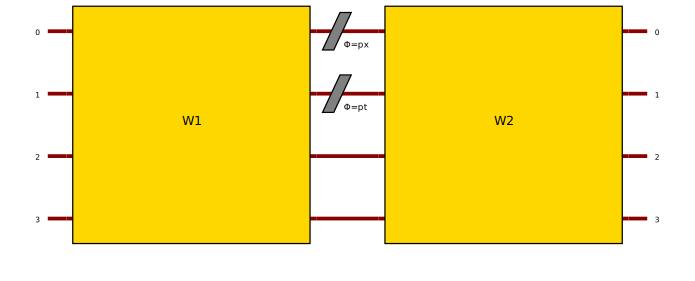

In [10]:
"Haar unitary parameters"
# number of parameters used for the two universal interferometers (2*m**2 per interferometer)
parameters = np.random.normal(size=4*m**2)

px = pcvl.P("px")
pt = pcvl.P("pt")
c = pcvl.Unitary(pcvl.Matrix.random_unitary(m, parameters[:2 * m ** 2]), name="W1")\
     // (0, pcvl.PS(px))\
     // (1, pcvl.PS(pt))\
     // pcvl.Unitary(pcvl.Matrix.random_unitary(m, parameters[2 * m ** 2:]), name="W2")

simulator_backend = pcvl.BackendFactory().get_backend("SLOS")
s1 = simulator_backend(pcvl.Matrix.random_unitary(m))
s1.compile(input_state)

pcvl.pdisplay(c)

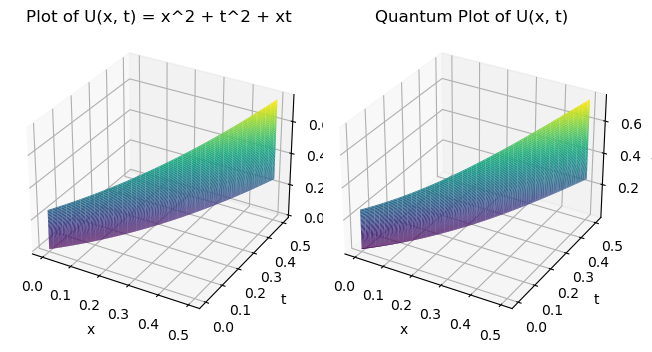

In [11]:
parameters = np.load('1689422837.619061(4)_params.ipy.npy')



import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Define the range of x and t values
x = np.linspace(0, 0.5, 100)  # Range of x values
t = np.linspace(0, 0.5, 100)  # Range of t values

# Create a meshgrid of x and t values
XX, TT = np.meshgrid(x, t)

XX = x 
TT = t

# Compute the values of U(x, t) for the first code
# U1 = XX**2 + TT**2 + XX*TT
# U1 = u(XX,TT)
U1 = np.zeros((len(XX), len(TT)))
for i in range(len(XX)):
    for j in range(len(TT)):
        U1[i,j]=u(XX[i],TT[j])



# Create a 3D plot for the first code
fig = plt.figure()
ax1 = fig.add_subplot(121, projection='3d')
ax1.plot_surface(XX, TT, U1, cmap='viridis')
ax1.set_xlabel('x')
ax1.set_ylabel('t')
ax1.set_zlabel('U(x, t)')
ax1.set_title('Plot of U(x, t) = x^2 + t^2 + xt')

# Compute the values of U(x, t) for the second code
# Replace the code below with the actual calculation from the second code snippet
# predict
U2 = np.zeros((len(XX), len(TT)))
# print(len(TT))
U_1 = pcvl.Matrix.random_unitary(m, parameters[:2 * m ** 2])
U_2 = pcvl.Matrix.random_unitary(m, parameters[2 * m ** 2:])
px = pcvl.P("x")
pt = pcvl.P("t")
c = pcvl.Unitary(U_2) // (0, pcvl.PS(px)) // (1, pcvl.PS(pt))// pcvl.Unitary(U_1)


for i in range(len(XX)):
    for j in range(len(TT)):
        # print(X[i])
        # print(T[j]).
        # print(XX)
        px.set_value(np.pi * XX[i])
        pt.set_value(np.pi * TT[j])
        U = c.compute_unitary(use_symbolic=False)
        s1.U = U
        f_theta = np.sum(np.multiply(s1.all_prob(input_state), lambda_random))
        # print(f_theta)
        # print(U1[i,j])
        # print('====================')
        U2[i,j]=f_theta

# Create a 3D plot for the second code
ax2 = fig.add_subplot(122, projection='3d')
ax2.plot_surface(XX, TT, U2, cmap='viridis')
ax2.set_xlabel('x')
ax2.set_ylabel('t')
ax2.set_zlabel('U(x, t)')
ax2.set_title('Quantum Plot of U(x, t)')

# Adjust the layout
plt.tight_layout()

# Show the plot
plt.show()
